# Preparation


In [1]:
import sys

sys.path.append("..")

In [2]:
from updpc import *
from tqdm.notebook import tqdm

In [3]:
img_dir = r"..\data\source"
tif_paths = list_tifs(img_dir)
print_list(tif_paths)

0 ..\data\source\glass_na1.4_2022-10-14T16-41-15.05_2_frame1-10.tif


Zero standard deviation is replaced with 1e-6.
Total number of elements: 50135040
Number of outliers: 12618
Outlier rate: 0.02516802619485503 %


<Axes: >

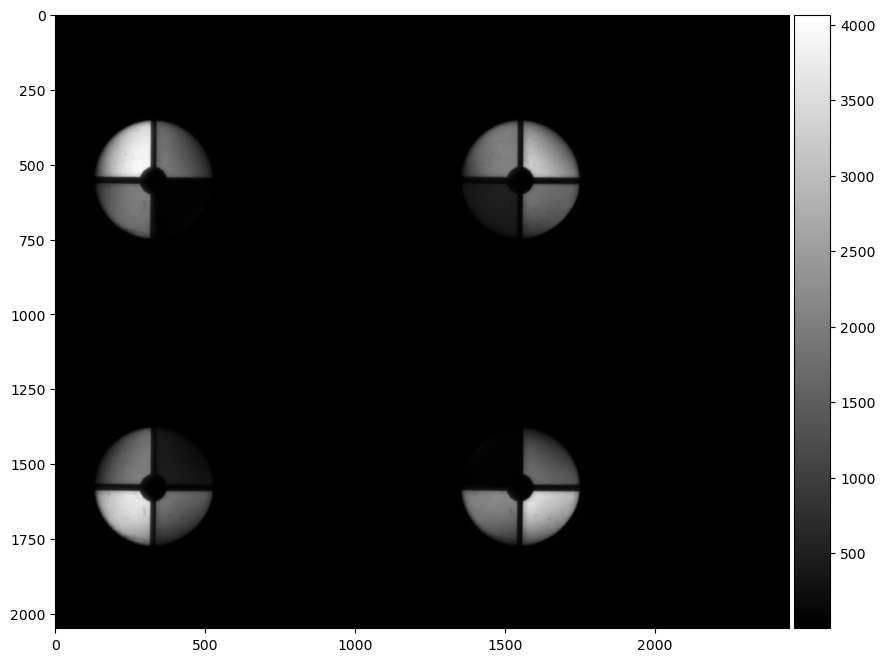

In [4]:
nsigma = 3

sub_tif_paths = filter_str_list(tif_paths, exclude="mean")


imgs = np.vstack([imread(tif_path) for tif_path in sub_tif_paths])

if imgs.ndim == 3:

    img_mean = mean_without_outliers(imgs, nsigma=nsigma, zero_sigma=True)

else:
    img_mean = imgs

imshow(img_mean)

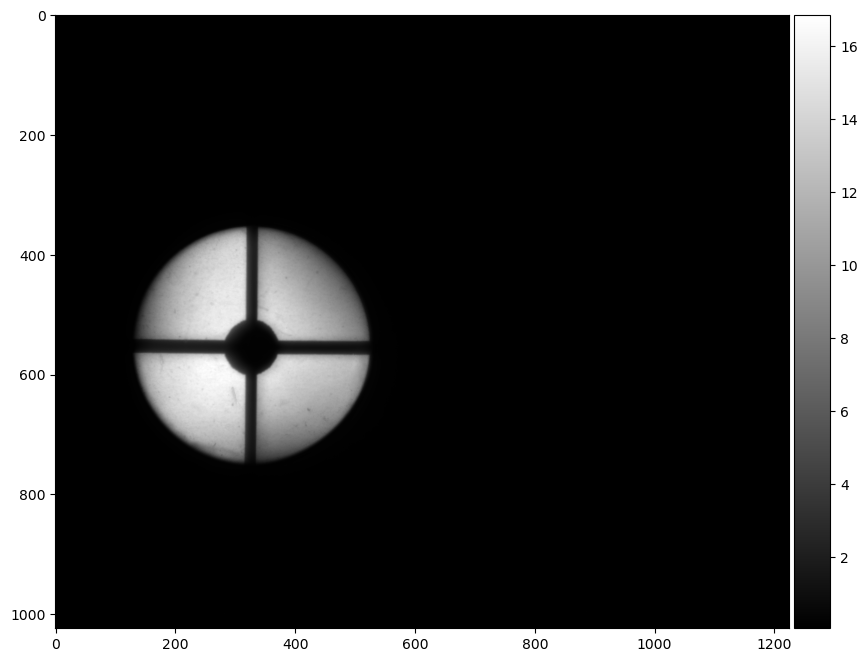

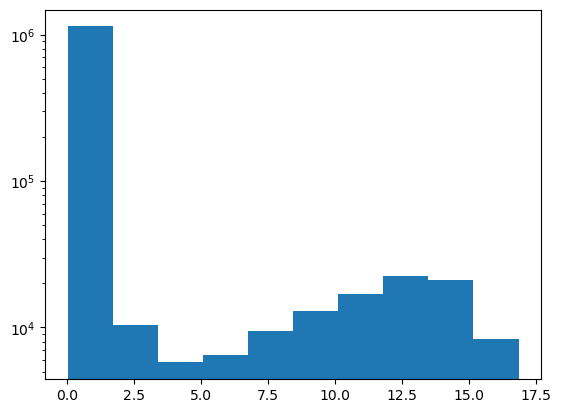

In [5]:
img = quad_to_normalized_intensity(img_mean)
imshow(img)
plt.show()
plt.hist(img.ravel())
plt.yscale("log")

<Axes: >

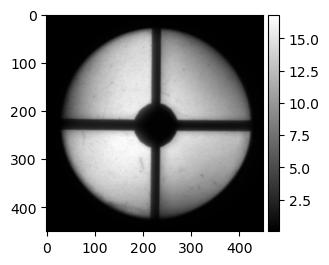

In [6]:
x_center = 325
y_center = 550
size = 450

x_lt = x_center - size // 2
y_lt = y_center - size // 2
img = img[y_lt : y_lt + size, x_lt : x_lt + size]
imshow(img, (3, 3))

In [7]:
# not_overwrite = True
not_overwrite = False

for path in sub_tif_paths:
    out_path = path.replace(".tif", f"_AVG_without_{nsigma}sigma.tif")
    if exists(out_path) and not_overwrite:
        print(out_path, "skip")
    else:
        imwrite_f32(out_path, img)

# Method comparison with compress images


In [8]:
lmfit_methods = [
    "leastsq",
    "least_squares",
    "differential_evolution",
    # "brute", # Large memory is required
    "basinhopping",
    "ampgo",
    "nelder",
    "lbfgsb",
    "powell",
    "cg",
    # "newton", # Jacobian is required
    "cobyla",
    "bfgs",
    "tnc",
    # "trust-ncg", # Jacobian is required
    # "trust-exact", # Jacobian is required
    # "trust-krylov", # Jacobian is required
    # "trust-constr", # Jacobian is required
    # "dogleg", # Jacobian is required
    "slsqp",
    "emcee",  # emcee version 3 is required
    "shgo",
    "dual_annealing",
]

  0%|          | 0/16 [00:00<?, ?it/s]

leastsq


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 273
    # data points      = 3136
    # variables        = 11
    chi-square         = 32639.9344
    reduced chi-square = 10.4447790
    Akaike info crit   = 7368.35728
    Bayesian info crit = 7434.91502
    R-squared          = 0.69257657
##  Warning: uncertainties could not be estimated:
    rad:     at initial value
    rad_in:  at initial value
    w_in:    at initial value
    f_cos:   at boundary
    B:       at boundary
    bx:      at initial value
    by:      at initial value
[[Variables]]
    rad:     28.1249998 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0000000 (init = 37.5)
    cx:      27.2976358 (init = 28.125)
    cy:      28.0275201 (init = 28.125)
    A:       14.4809647 (init = 16.85254)
    B:       7.1178e-09 (init = 0.043252)
    bx:      28.1250000 (init = 28.125)
    by:    

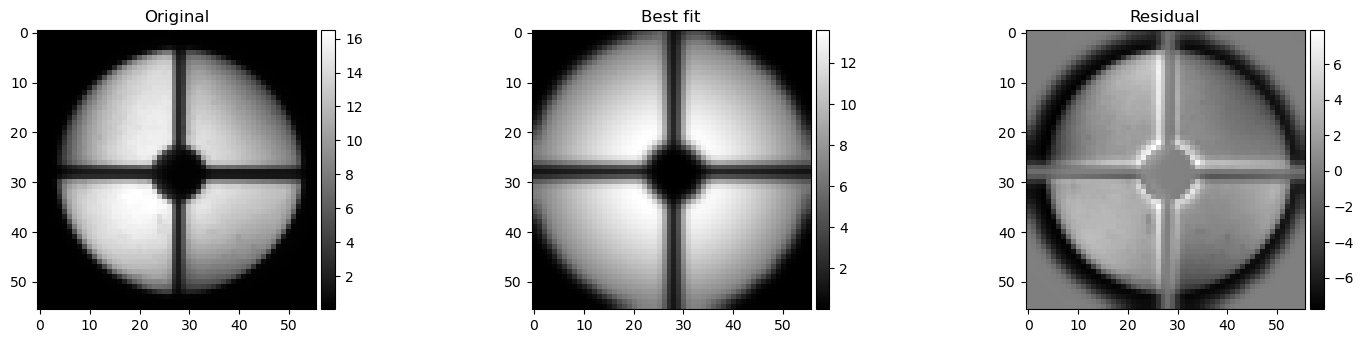

least_squares


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 314
    # data points      = 3136
    # variables        = 11
    chi-square         = 32383.1775
    reduced chi-square = 10.3626168
    Akaike info crit   = 7343.59089
    Bayesian info crit = 7410.14863
    R-squared          = 0.69499487
##  Warning: uncertainties could not be estimated:
    rad:     at initial value
    rad_in:  at initial value
    w_in:    at initial value
    B:       at boundary
    bx:      at initial value
    by:      at initial value
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0012575 (init = 37.5)
    cx:      27.2203203 (init = 28.125)
    cy:      28.0055028 (init = 28.125)
    A:       14.0099704 (init = 16.85254)
    B:       4.0213e-14 (init = 0.043252)
    bx:      28.1250000 (init = 28.125)
    by:      28.1250000 (init 

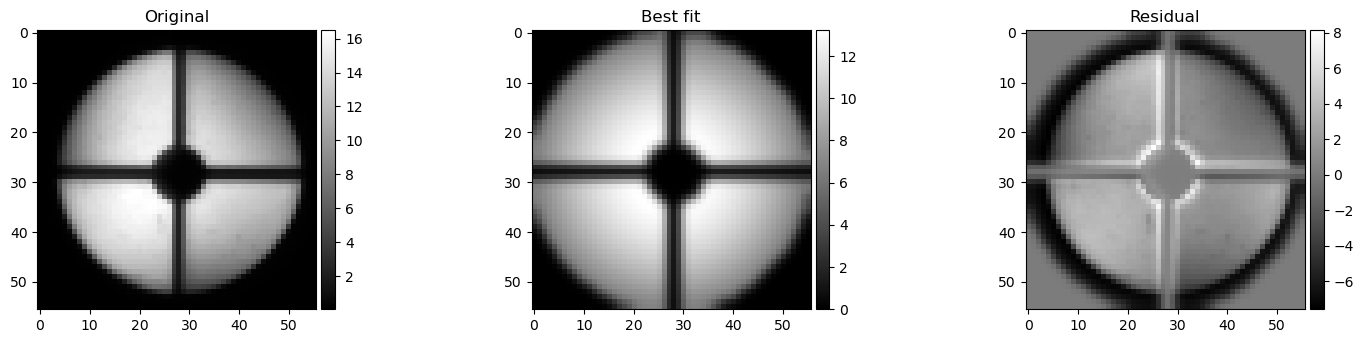

differential_evolution


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 12333
    # data points      = 3136
    # variables        = 11
    chi-square         = 5292.62837
    reduced chi-square = 1.69364108
    Akaike info crit   = 1663.27853
    Bayesian info crit = 1729.83626
    R-squared          = 0.95015070
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     23.9626621 (init = 28.125)
    rad_in:  5.64435511 (init = 6.25)
    w_in:    1.16850610 (init = 1.5)
    f_cos:   25.5220906 (init = 37.5)
    cx:      27.8028129 (init = 28.125)
    cy:      28.0979814 (init = 28.125)
    A:       15.8267573 (init = 16.85254)
    B:       0.00196232 (init = 0.043252)
    bx:

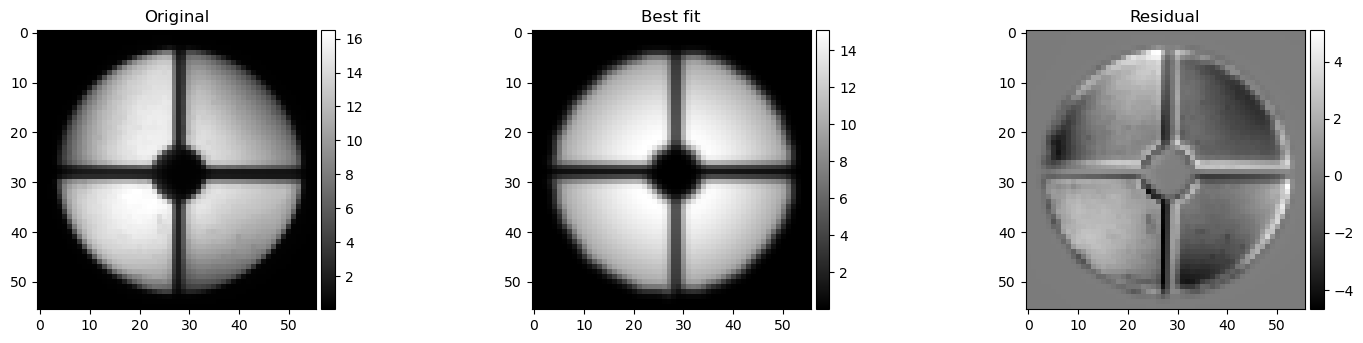

basinhopping


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = basinhopping
    # function evals   = 102314
    # data points      = 3136
    # variables        = 11
    chi-square         = 34986.9485
    reduced chi-square = 11.1958235
    Akaike info crit   = 7586.11664
    Bayesian info crit = 7652.67438
    R-squared          = 0.67047092
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.5790726 (init = 37.5)
    cx:      27.4268845 (init = 28.125)
    cy:      28.0912440 (init = 28.125)
    A:       12.7481424 (init = 16.85254)
    B:       0.04302351 (init = 0.043252)
    bx:      28.

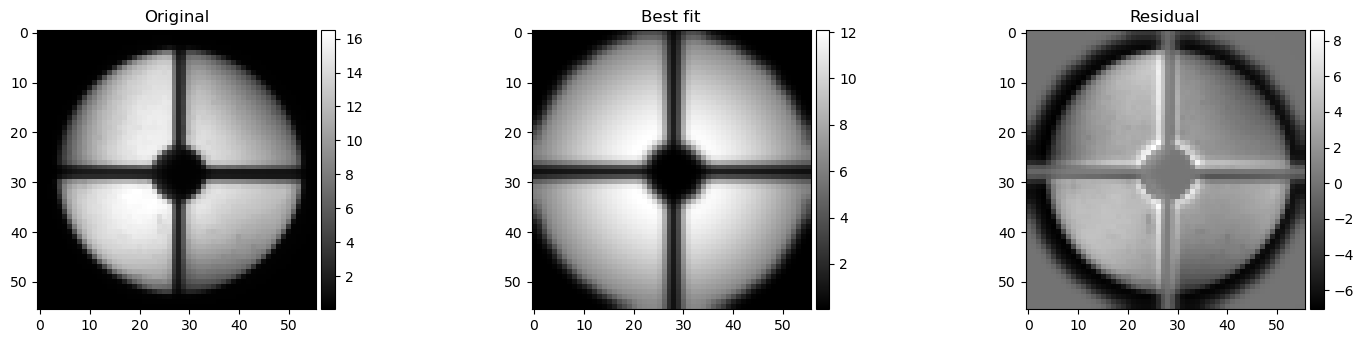

ampgo


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 41868
    # data points      = 3136
    # variables        = 11
    chi-square         = 32475.8312
    reduced chi-square = 10.3922660
    Akaike info crit   = 7352.55070
    Bayesian info crit = 7419.10843
    R-squared          = 0.69412220
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0000142 (init = 37.5)
    cx:      27.2679380 (init = 28.125)
    cy:      28.0414942 (init = 28.125)
    A:       13.9433767 (init = 16.85254)
    B:       0.04286403 (init = 0.0

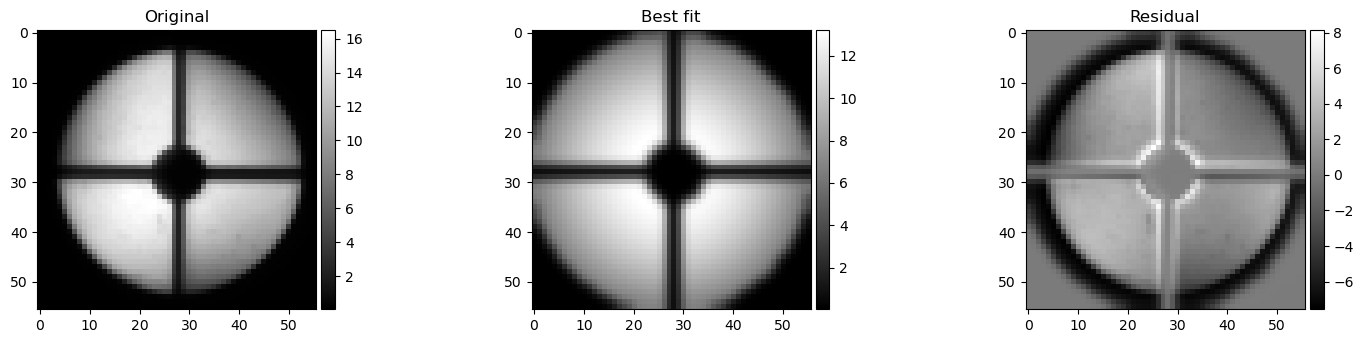

nelder


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1416
    # data points      = 3136
    # variables        = 11
    chi-square         = 15202.7268
    reduced chi-square = 4.86487257
    Akaike info crit   = 4972.25974
    Bayesian info crit = 5038.81748
    R-squared          = 0.85681116
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     24.5274083 (init = 28.125)
    rad_in:  6.79344693 (init = 6.25)
    w_in:    1.43812732 (init = 1.5)
    f_cos:   34.2290582 (init = 37.5)
    cx:      28.7769784 (init = 28.125)
    cy:      28.1079137 (init = 28.125)
    A:       14.4724053 (init = 16.85254)
    B:       0.02387039 (init = 0.043252)
    bx:      29.428

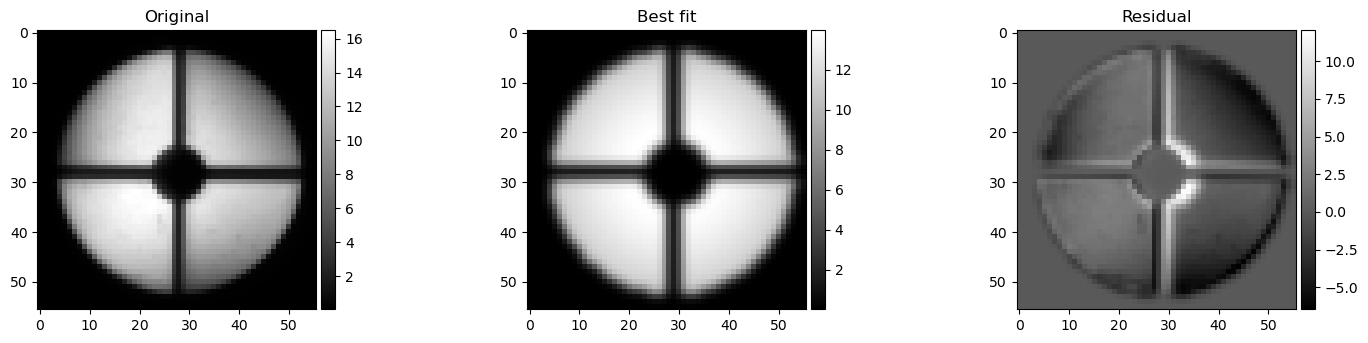

lbfgsb


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = L-BFGS-B
    # function evals   = 1356
    # data points      = 3136
    # variables        = 11
    chi-square         = 32475.8312
    reduced chi-square = 10.3922660
    Akaike info crit   = 7352.55070
    Bayesian info crit = 7419.10843
    R-squared          = 0.69412220
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0000142 (init = 37.5)
    cx:      27.2679380 (init = 28.125)
    cy:      28.0414942 (init = 28.125)
    A:       13.9433767 (init = 16.85254)
    B:       0.04286403 (init = 0.043252)
    bx:      28.125000

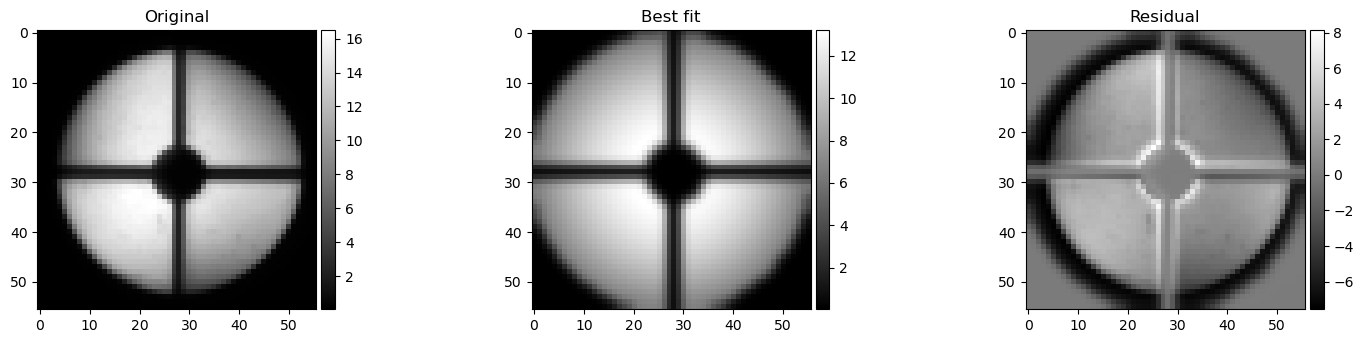

powell


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 1354
    # data points      = 3136
    # variables        = 11
    chi-square         = 5354.61201
    reduced chi-square = 1.71347584
    Akaike info crit   = 1699.79181
    Bayesian info crit = 1766.34955
    R-squared          = 0.94956690
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     23.7657806 (init = 28.125)
    rad_in:  5.54581863 (init = 6.25)
    w_in:    1.19463284 (init = 1.5)
    f_cos:   25.0037075 (init = 37.5)
    cx:      27.5900893 (init = 28.125)
    cy:      28.0973658 (init = 28.125)
    A:       16.0968212 (init = 16.85254)
    B:       0.06487800 (init = 0.043252)
    bx:      28.3693357 

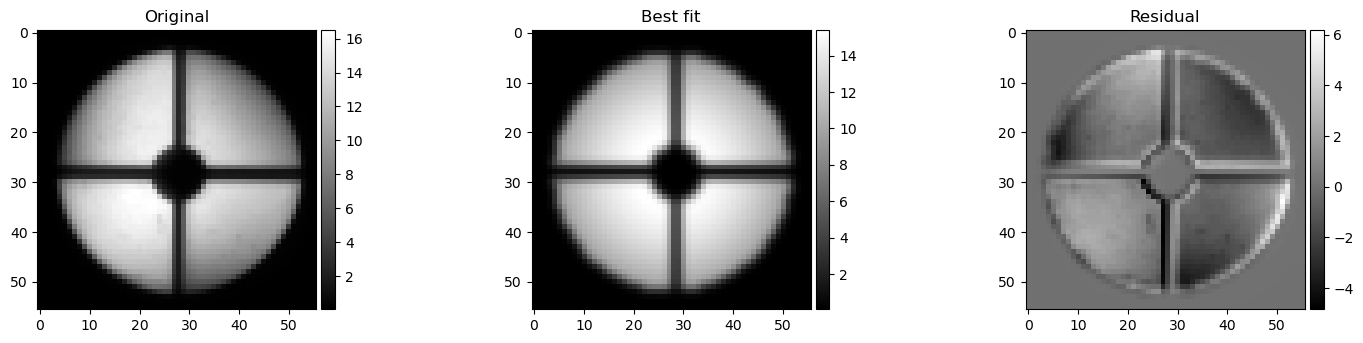

cg


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = CG
    # function evals   = 923
    # data points      = 3136
    # variables        = 11
    chi-square         = 32430.2573
    reduced chi-square = 10.3776823
    Akaike info crit   = 7348.14681
    Bayesian info crit = 7414.70454
    R-squared          = 0.69455144
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0000047 (init = 37.5)
    cx:      27.6179239 (init = 28.125)
    cy:      28.1431247 (init = 28.125)
    A:       13.9834389 (init = 16.85254)
    B:       0.04291831 (init = 0.043252)
    bx:      28.1250000 (init

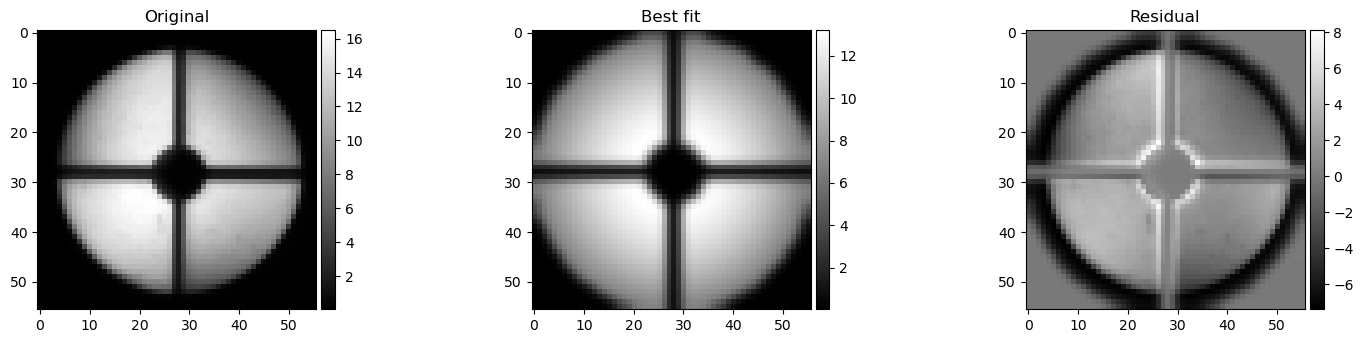

cobyla


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = COBYLA
    # function evals   = 282
    # data points      = 3136
    # variables        = 11
    chi-square         = 12024.7201
    reduced chi-square = 3.84791042
    Akaike info crit   = 4236.83554
    Bayesian info crit = 4303.39327
    R-squared          = 0.88674363
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     23.8138000 (init = 28.125)
    rad_in:  5.89667774 (init = 6.25)
    w_in:    2.21242946 (init = 1.5)
    f_cos:   31.8744865 (init = 37.5)
    cx:      27.9434356 (init = 28.125)
    cy:      28.0446008 (init = 28.125)
    A:       14.4510783 (init = 16.85254)
    B:       0.03700620 (init = 0.043252)
    bx:      28.4665317 (

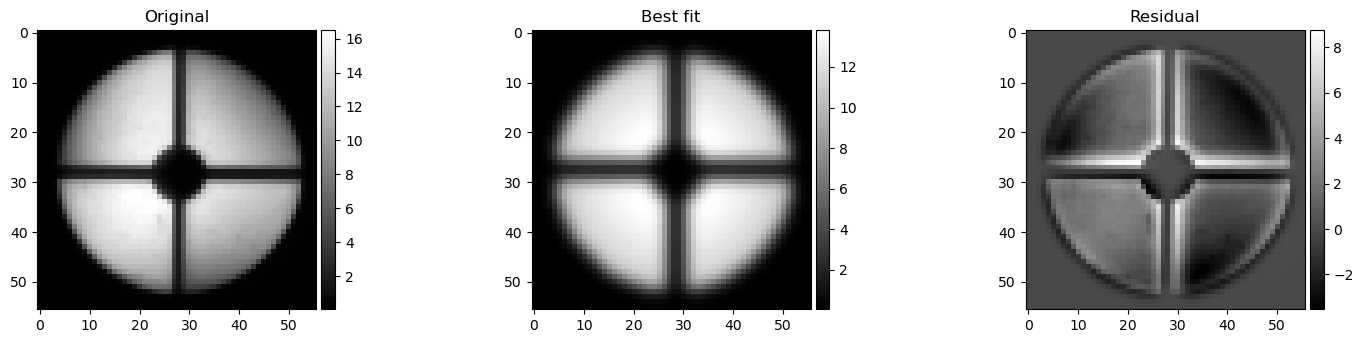

bfgs


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = BFGS
    # function evals   = 851
    # data points      = 3136
    # variables        = 11
    chi-square         = 34986.9485
    reduced chi-square = 11.1958235
    Akaike info crit   = 7586.11664
    Bayesian info crit = 7652.67438
    R-squared          = 0.67047092
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.5790726 (init = 37.5)
    cx:      27.4268845 (init = 28.125)
    cy:      28.0912440 (init = 28.125)
    A:       12.7481424 (init = 16.85254)
    B:       0.04302351 (init = 0.043252)
    bx:      28.1250000 (in

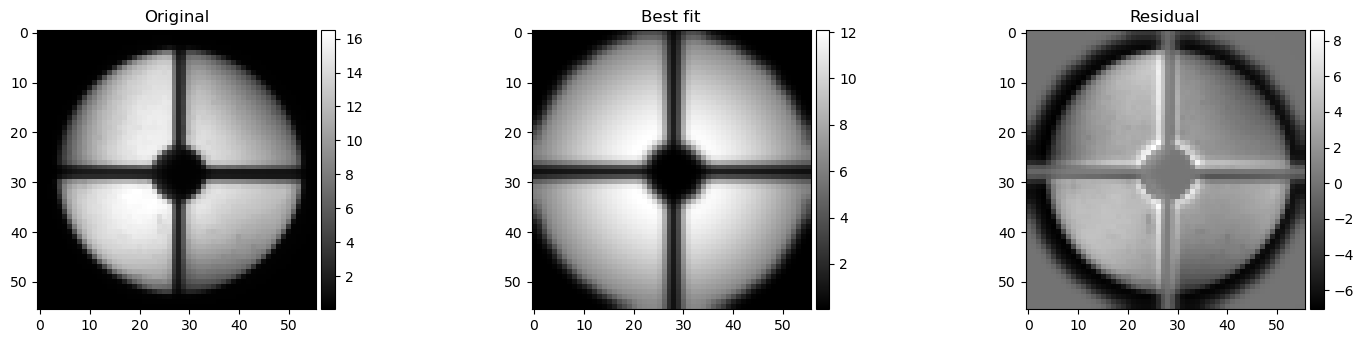

tnc


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = TNC
    # function evals   = 1176
    # data points      = 3136
    # variables        = 11
    chi-square         = 32639.1625
    reduced chi-square = 10.4445320
    Akaike info crit   = 7368.28312
    Bayesian info crit = 7434.84085
    R-squared          = 0.69258384
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0330693 (init = 37.5)
    cx:      27.8488731 (init = 28.125)
    cy:      28.9079468 (init = 28.125)
    A:       13.6336697 (init = 16.85254)
    B:       0.04169503 (init = 0.043252)
    bx:      28.1250000 (in

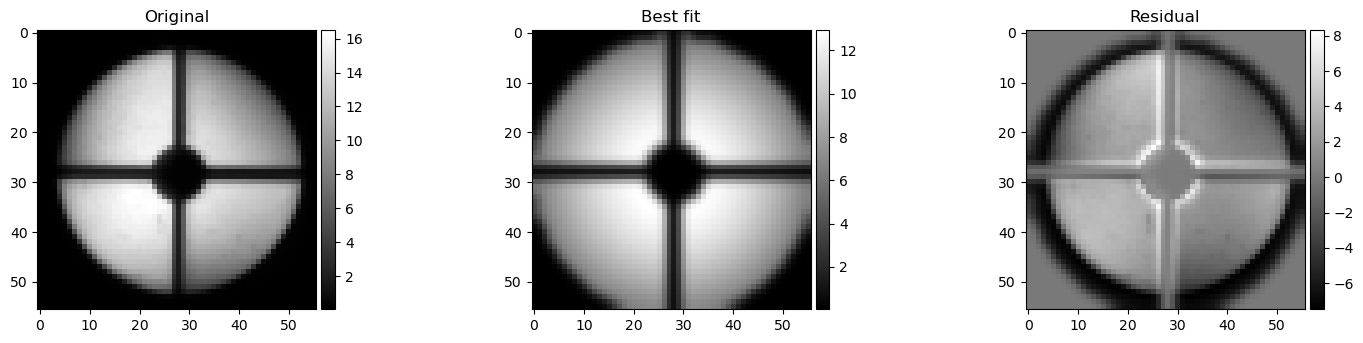

slsqp


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = SLSQP
    # function evals   = 1282
    # data points      = 3136
    # variables        = 11
    chi-square         = 32007.5533
    reduced chi-square = 10.2424170
    Akaike info crit   = 7307.00267
    Bayesian info crit = 7373.56041
    R-squared          = 0.69853274
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     28.1250000 (init = 28.125)
    rad_in:  6.25000000 (init = 6.25)
    w_in:    1.50000000 (init = 1.5)
    f_cos:   25.0185382 (init = 37.5)
    cx:      27.0305996 (init = 28.125)
    cy:      27.9791894 (init = 28.125)
    A:       13.8482992 (init = 16.85254)
    B:       0.00450173 (init = 0.043252)
    bx:      28.1250000 (

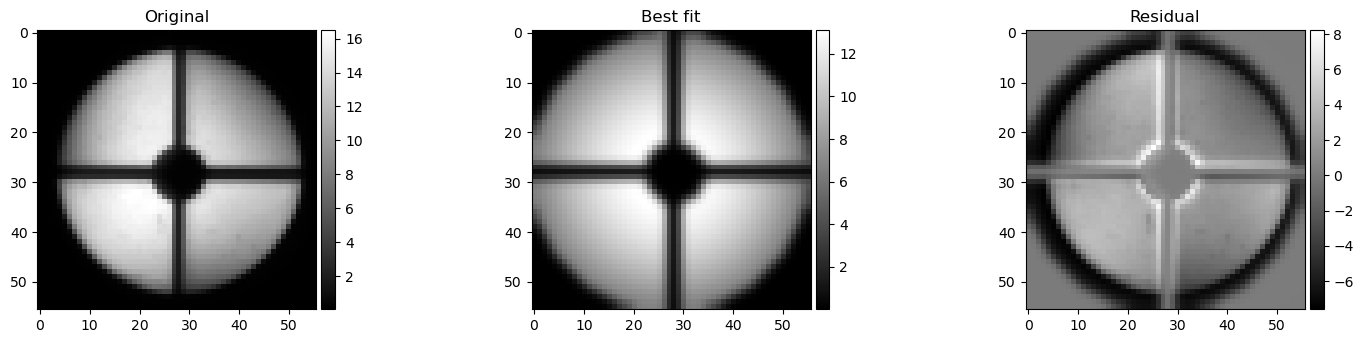

emcee


  0%|          | 0/10 [00:00<?, ?it/s]






















































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:08<00:00, 14.63it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 64.96497131 103.68517988  99.64875791  90.39170375  53.39966002
  35.79335691 131.75072741  77.67422679  68.77117003  95.1565711
 126.64312709]
[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 100000
    # data points      = 3136
    # variables        = 11
    chi-square         = 5658.94800
    reduced chi-square = 1.81086336
    Akaike info crit   = 1873.14915
    Bayesian info crit = 1939.70688
    R-squared          = 0.94670047
[[Variables]]
    rad:     24.0912034 +/- 0.07490783 (0.31%) (init = 28.125)
    rad_in:  5.70154040 +/- 0.07397470 (1.30%) (init = 6.25)
    w_in:    1.46378230 +/- 0.07637881 (5.22%) (init = 1.5)
    f_cos:   25.0832574 +/- 0.28078387 (1.12%) (init = 37.5)
    cx:      27.7965672 +/- 0.04025603 (0.14%) (init = 28.125)
 

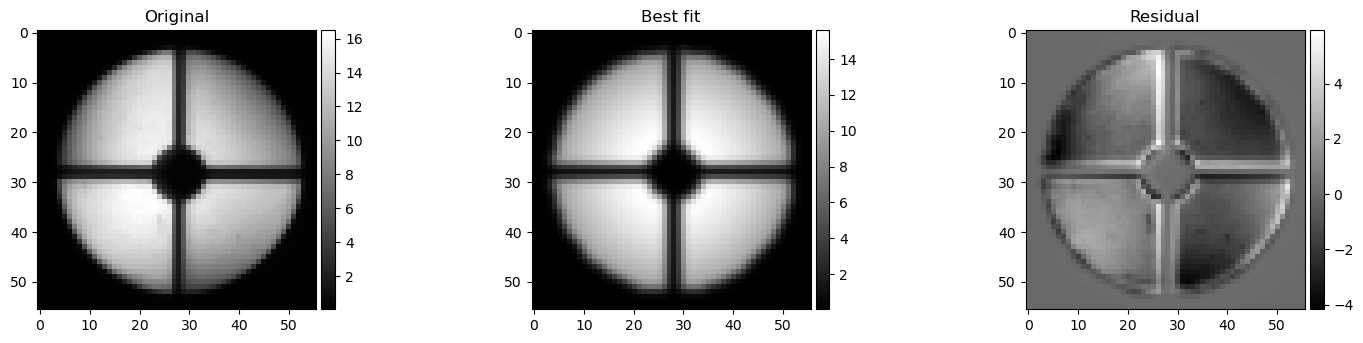






















































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:08<00:00, 14.58it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 40.04037092 122.56372435 116.97552767 128.66579238  98.80249425
  35.4726067   74.98389452 122.52252852  61.30487528  48.80024636
 116.84819235]






















































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:09<00:00, 14.31it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 46.99172197 115.53810476  76.89913631 129.90754006 113.14865616
  39.21749841  93.56655103 132.39708486  66.14558533  76.79394312
  40.84162526]























































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:11<00:00, 13.99it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 37.99359982  99.62792836  90.81183357 135.39519813  53.67984475
  44.02308497 104.16830568  89.18127959  50.17618133  63.62399492
 128.88604424]























































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:09<00:00, 14.47it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 51.29403077  79.03240041  90.37899678 133.24385141  62.16650699
  54.99939901  85.119649   130.90353453  72.76702911 101.82468614
  66.74973747]





















































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:07<00:00, 14.83it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 53.58812984 127.94098439  78.53833107 126.21584232 101.95669214
  76.3748498   49.63345412  77.21276671 116.27043789  45.66252141
  75.36403319]






















































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:09<00:00, 14.35it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 73.35748256  84.93916631  35.55579002 107.18185954  39.28479665
  30.08097388  68.95337413  60.06278602  61.14040866  98.62382027
 127.51298858]























































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:09<00:00, 14.41it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 48.32666183 102.58609417 107.16448247 129.09118558  64.37339807
 107.19453848 108.60988939 113.83012361  79.17955604  61.14383118
 125.18468785]






















































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:11<00:00, 14.01it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 75.20572839  76.43682862 106.27517938 139.24476726 126.55310103
  60.61499146 106.37042649 134.51730904  36.26234957  79.95974341
 131.17907011]























































































































































































































































































































































































































































































































100%|██████████| 1000/1000 [01:13<00:00, 13.68it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 65.83649302 122.82138276  99.84889389 143.37613226  52.92076728
  95.14189705  74.95271558  82.31043989  54.38851446  42.59273215
 122.79962054]
shgo


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = shgo
    # function evals   = 2184
    # data points      = 3136
    # variables        = 11
    chi-square         = 71900.3562
    reduced chi-square = 23.0081140
    Akaike info crit   = 9844.99665
    Bayesian info crit = 9911.55439
    R-squared          = 0.32279723
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     42.1875000 (init = 28.125)
    rad_in:  4.16666667 (init = 6.25)
    w_in:    1.00000000 (init = 1.5)
    f_cos:   25.0000000 (init = 37.5)
    cx:      27.7894765 (init = 28.125)
    cy:      28.9486255 (init = 28.125)
    A:       11.2350235 (init = 16.85254)
    B:       0.03243900 (init = 0.043252)
    bx:      42.1875000 (i

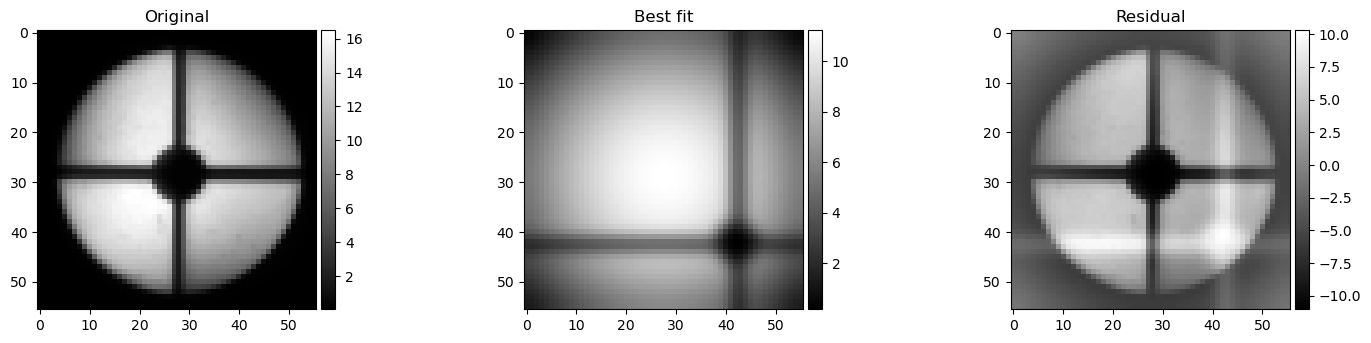

dual_annealing


  0%|          | 0/10 [00:00<?, ?it/s]

[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = dual_annealing
    # function evals   = 53897
    # data points      = 3136
    # variables        = 11
    chi-square         = 5165.61516
    reduced chi-square = 1.65299685
    Akaike info crit   = 1587.10263
    Bayesian info crit = 1653.66037
    R-squared          = 0.95134699
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     23.9931394 (init = 28.125)
    rad_in:  5.71777389 (init = 6.25)
    w_in:    1.27156623 (init = 1.5)
    f_cos:   25.0007085 (init = 37.5)
    cx:      27.8065939 (init = 28.125)
    cy:      28.0072612 (init = 28.125)
    A:       15.9959075 (init = 16.85254)
    B:       0.06486920 (init = 0.043252)
    bx:      28

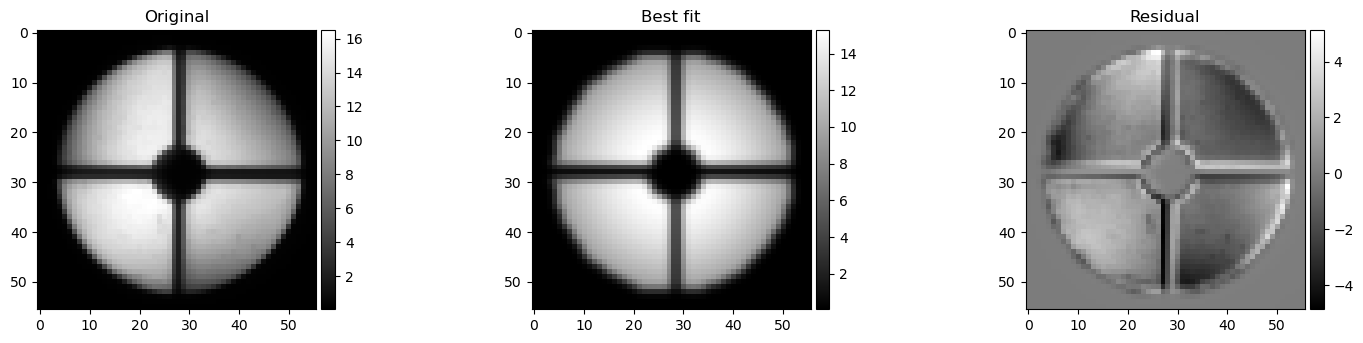

In [9]:
compress_num = 8
repeat_num = 10

# params of cosine_pupil: rad, rad_in, w_in, f_cos, cx, cy, A, B
initial_params = [
    size / 2 / compress_num,  # rad
    50 / compress_num,  # rad_in
    12 / compress_num,  # w_in
    300 / compress_num,  # f_cos
    size / 2 / compress_num,  # cx
    size / 2 / compress_num,  # cy
    np.max(img),  # A
    np.min(img),  # B
    size / 2 / compress_num,  # bx
    size / 2 / compress_num,  # by
    8 / compress_num, # sigma
]
resultss = []
for method in tqdm(lmfit_methods):
    print(method)
    resultss.append(
        [
            fit_source(
                compress(img, compress_num),
                cosine_source_2center_blur,
                initial_params,
                method,
                fix_params=[],
                verbose=(i == 0),
                seed=i,
            )
            for i in tqdm(range(repeat_num))
        ]
    )

In [10]:
[
    (
        np.mean([result.redchi for result in results]),
        np.std([result.redchi for result in results]),
        method,
    )
    for method, results in zip(lmfit_methods, resultss)
]

[(np.float64(10.44477900967996), np.float64(0.0), 'leastsq'),
 (np.float64(10.362616800328556),
  np.float64(1.7763568394002505e-15),
  'least_squares'),
 (np.float64(1.6638552536748699),
  np.float64(0.01240156105502377),
  'differential_evolution'),
 (np.float64(11.195823523754994), np.float64(0.0), 'basinhopping'),
 (np.float64(9.741010524011447), np.float64(0.8466243277094285), 'ampgo'),
 (np.float64(4.864872574053047), np.float64(8.881784197001252e-16), 'nelder'),
 (np.float64(10.392265971101452), np.float64(0.0), 'lbfgsb'),
 (np.float64(1.7134758416111011), np.float64(2.220446049250313e-16), 'powell'),
 (np.float64(10.377682338152127), np.float64(0.0), 'cg'),
 (np.float64(3.847910420134963), np.float64(8.881784197001252e-16), 'cobyla'),
 (np.float64(11.195823523754994), np.float64(0.0), 'bfgs'),
 (np.float64(10.444532005067476), np.float64(1.7763568394002505e-15), 'tnc'),
 (np.float64(10.242417046156888), np.float64(0.0), 'slsqp'),
 (np.float64(1.873107365308557), np.float64(0.22

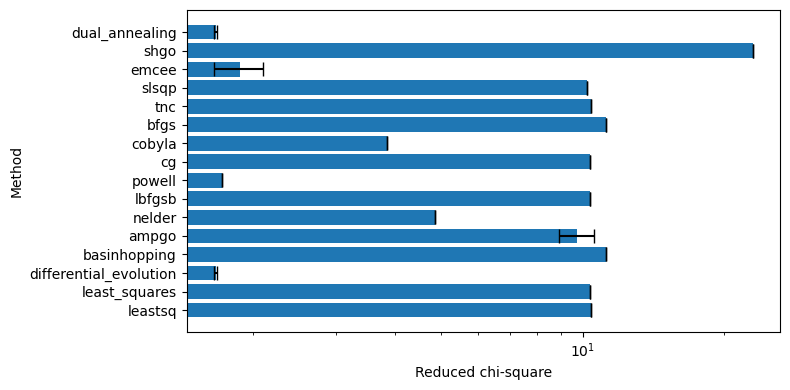

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for i, results in enumerate(resultss):
    redchis = [result.redchi for result in results]
    ax.barh(i, np.mean(redchis), xerr=np.std(redchis), capsize=5, color="C0")
    # ax.scatter(redchis, [i] * len(redchis), alpha=0.5, color="C1")
ax.set_yticks(range(len(resultss)))
ax.set_yticklabels(lmfit_methods)
ax.set_xlabel("Reduced chi-square")
ax.set_ylabel("Method")
ax.set_xscale("log")
fig.tight_layout()
fig.savefig(r"..\data\source\fitting_method_comparison.svg")

In [12]:
best_method = lmfit_methods[
    np.argmin([np.min([result.redchi for result in results]) for results in resultss])
]
best_method

'dual_annealing'

In [13]:
best_method = lmfit_methods[
    np.argmin([np.mean([result.redchi for result in results]) for results in resultss])
]
best_method

'dual_annealing'

In [14]:
best_params = resultss[lmfit_methods.index(best_method)][
    np.argmin([result.redchi for result in resultss[lmfit_methods.index(best_method)]])
].best_values
best_params

{'rad': np.float64(24.085939168318944),
 'rad_in': np.float64(5.718074354499575),
 'w_in': np.float64(1.2740735410142399),
 'f_cos': np.float64(25.000279560927012),
 'cx': np.float64(27.771303966905926),
 'cy': np.float64(27.92592059749496),
 'A': np.float64(16.00781612908162),
 'B': np.float64(0.01701453328103053),
 'bx': np.float64(28.27496399066888),
 'by': np.float64(28.249530076405065),
 'sigma': np.float64(0.8931226437843554)}

In [15]:
for key in ["rad", "rad_in", "w_in", "f_cos", "cx", "cy", "bx", "by", "sigma"]:
    best_params[key] *= compress_num
best_params

{'rad': np.float64(192.68751334655155),
 'rad_in': np.float64(45.7445948359966),
 'w_in': np.float64(10.192588328113919),
 'f_cos': np.float64(200.0022364874161),
 'cx': np.float64(222.1704317352474),
 'cy': np.float64(223.4073647799597),
 'A': np.float64(16.00781612908162),
 'B': np.float64(0.01701453328103053),
 'bx': np.float64(226.19971192535104),
 'by': np.float64(225.99624061124052),
 'sigma': np.float64(7.144981150274843)}

# Fine tuning


[[Model]]
    Model(cosine_source_2center_blur)
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 10128
    # data points      = 202500
    # variables        = 11
    chi-square         = 337240.802
    reduced chi-square = 1.66547715
    Akaike info crit   = 103308.610
    Bayesian info crit = 103421.014
    R-squared          = 0.95171940
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    rad:     193.800360 (init = 192.6875)
    rad_in:  45.2252984 (init = 45.74459)
    w_in:    9.87333469 (init = 10.19259)
    f_cos:   188.428429 (init = 200.0022)
    cx:      226.663286 (init = 222.1704)
    cy:      226.931509 (init = 223.4074)
    A:       16.2194243 (init = 16.00782)
    B:       0.02126775 (ini

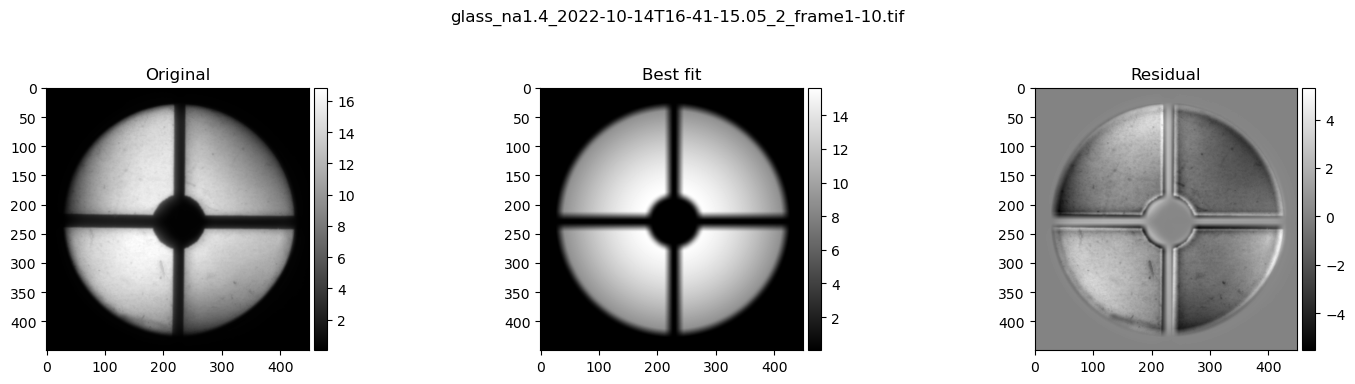

In [16]:
compress_num = 1
lmfit_method = "differential_evolution"
# lmfit_method = best_method
initial_params = best_params.values()
result = fit_source(
    compress(img, compress_num),
    cosine_source_2center_blur,
    initial_params,
    lmfit_method,
    fix_params=[],
    title=basename(path),
)

In [17]:
best_params = result.best_values
best_params

{'rad': np.float64(193.8003604244883),
 'rad_in': np.float64(45.22529844927895),
 'w_in': np.float64(9.87333469231021),
 'f_cos': np.float64(188.4284291244159),
 'cx': np.float64(226.6632855435083),
 'cy': np.float64(226.93150876310196),
 'A': np.float64(16.219424280253214),
 'B': np.float64(0.021267754644522057),
 'bx': np.float64(228.95400970800983),
 'by': np.float64(229.73555961569053),
 'sigma': np.float64(7.296539758440288)}

In [18]:
pix_to_na = 1.4 / best_params["rad"]
pix_to_na

np.float64(0.007223928773576719)

In [19]:
for key in ["rad", "rad_in", "w_in", "f_cos", "cx", "cy", "bx", "by", "sigma"]:
    best_params[key] *= pix_to_na
best_params

{'rad': np.float64(1.4),
 'rad_in': np.float64(0.3267043347613408),
 'w_in': np.float64(0.07132426657493297),
 'f_cos': np.float64(1.3611935509117297),
 'cx': np.float64(1.6373994303511856),
 'cy': np.float64(1.6393370557849496),
 'A': np.float64(16.219424280253214),
 'B': np.float64(0.021267754644522057),
 'bx': np.float64(1.6539474585554557),
 'by': np.float64(1.6595933194215367),
 'sigma': np.float64(0.05270968350854332)}

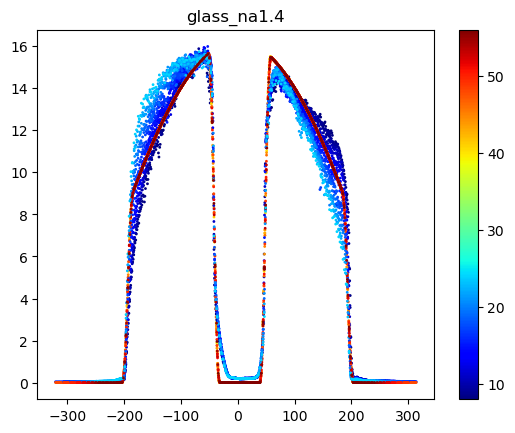

In [20]:
cx = round(result.values["cx"])
cy = round(result.values["cy"])

img_out = result.userargs[0]
img_fit = result.best_fit

angle_num = 32
in_rect = 8
distss = []
valuess = []
css = []
for i in range(in_rect, angle_num + 1 - in_rect):
    dists, values = value_on_line(img_out, i * np.pi / 2 / angle_num, cx, cy)
    distss.extend(dists)
    valuess.extend(values)
    css.extend([i] * len(dists))
    dists, values = value_on_line(img_fit, i * np.pi / 2 / angle_num, cx, cy)
    distss.extend(dists)
    valuess.extend(values)
    css.extend([i + angle_num] * len(dists))
plt.scatter(distss, valuess, c=css, cmap="jet", s=1)
plt.title(basename(path).split("_2022")[0])
cb()
plt.show()